# 시계열 예측 문제
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

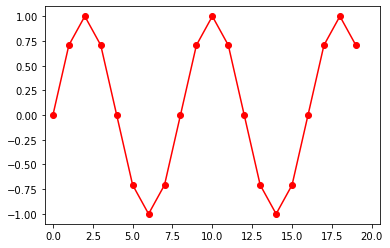

In [2]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

### 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환
#### (대각선 위의 성분들이 같은 정사각 행렬)

In [3]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  1.22464680e-16, -7.07106781e-01,
        -1.00000000e+00, -7.07106781e-01, -2.44929360e-16,
         7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
         3.67394040e-16, -7.07106781e-01, -1.00000000e+00,
        -7.07106781e-01, -4.89858720e-16,  7.07106781e-01,
         1.00000000e+00,  7.07106781e-01],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
         1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
        -7.07106781e-01, -2.44929360e-16,  7.07106781e-01,
         1.00000000e+00,  7.07106781e-01,  3.67394040e-16,
        -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
        -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  0.00000000e+00],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16,
        -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
        -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  3.6

In [4]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [5]:
X_train[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [6]:
Y_train[:4]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

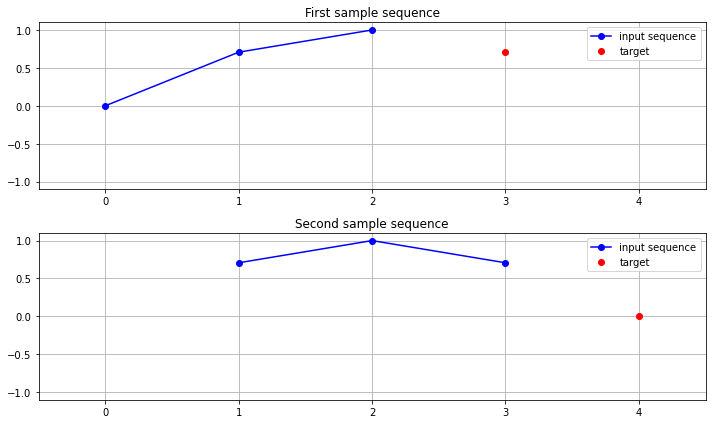

In [7]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)

In [9]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation="linear"))
model.summary()
# 파라미터 (1 + 10) * 10 + 10 = 129

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mse', optimizer='sgd')

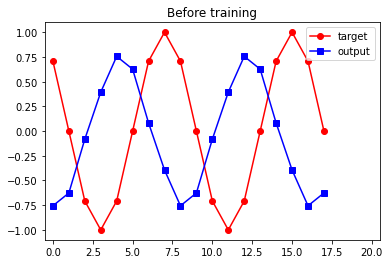

In [11]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [12]:
history = model.fit(X_train, Y_train, epochs=100) 

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 1.2219
Epoch 2/100
1/1 [==============================] - 0s 903us/step - loss: 1.1191
Epoch 3/100
1/1 [==============================] - 0s 980us/step - loss: 1.0261
Epoch 4/100
1/1 [==============================] - 0s 982us/step - loss: 0.9418
Epoch 5/100
1/1 [==============================] - 0s 769us/step - loss: 0.8651
Epoch 6/100
1/1 [==============================] - 0s 847us/step - loss: 0.7953
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7316
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6733
Epoch 9/100
1/1 [==============================] - 0s 895us/step - loss: 0.6200
Epoch 10/100
1/1 [==============================] - 0s 842us/step - loss: 0.5711
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 0.5262
Epoch 12/100
1/1 [==============================] - 0s 981us/step - loss: 0.4849
Epoch 13/100
1/1 [===========================

### 결과 확인

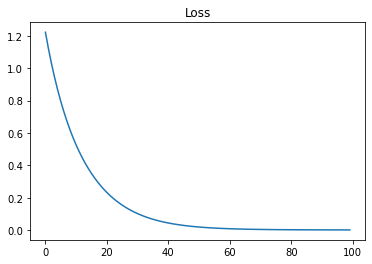

In [13]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show() 

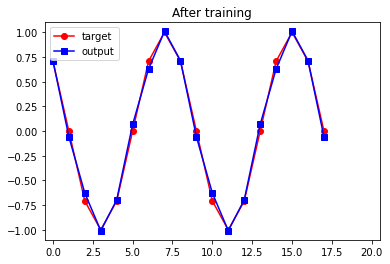

In [14]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show() 

In [15]:
# 입력에 대한 weights
model.weights[0]

<tf.Variable 'simple_rnn/simple_rnn_cell/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[ 0.6578415 , -0.39673924, -0.76611876,  0.714946  , -0.39057568,
        -0.4917922 ,  0.01214183,  0.4717072 ,  0.35385975,  0.2668582 ]],
      dtype=float32)>

In [16]:
# 유닛에 대한 weights
model.weights[1]

<tf.Variable 'simple_rnn/simple_rnn_cell/recurrent_kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.36598417, -0.41237187,  0.07205033,  0.32727763,  0.23657292,
        -0.25634316, -0.15571372, -0.03290741, -0.08710875, -0.4708088 ],
       [-0.18544975,  0.6556593 ,  0.18857367,  0.02857488,  0.13855666,
        -0.16789754,  0.40656447,  0.31033975, -0.11308137, -0.4572894 ],
       [ 0.29866236,  0.11767911, -0.08589939,  0.28775576, -0.43322048,
        -0.34153554, -0.4755406 ,  0.41718858, -0.33104244, -0.10313024],
       [ 0.18058811,  0.18298282, -0.5297917 ,  0.4027508 ,  0.24580331,
         0.39124748, -0.22591634, -0.09112235,  0.46246797, -0.3201197 ],
       [ 0.02565909, -0.35718283,  0.12548572,  0.3949914 , -0.43169942,
         0.41123807,  0.5265925 ,  0.20031902, -0.25119224, -0.10975732],
       [-0.07254684, -0.22649227, -0.70872474, -0.09761057,  0.00103046,
        -0.47800174,  0.48330972,  0.22211176, -0.18058655,  0.1341561 ],
       [ 0.5167693 ,

### model 2

In [17]:
model2 = Sequential()
model2.add(SimpleRNN(5, input_shape=(3, 1)))
model2.add(Dense(1, activation="linear"))
model2.summary()
# 파라미터 (1 + 5) * 5 + 5 = 35

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [18]:
model2.compile(loss='mse', optimizer='sgd')

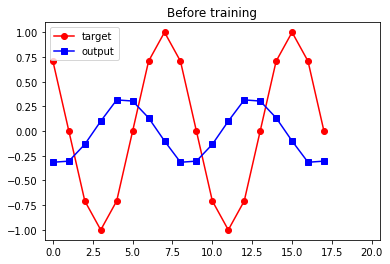

In [19]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model2.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [20]:
history2 = model2.fit(X_train, Y_train, epochs=100) 

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6581
Epoch 2/100
1/1 [==============================] - 0s 829us/step - loss: 0.6360
Epoch 3/100
1/1 [==============================] - 0s 880us/step - loss: 0.6151
Epoch 4/100
1/1 [==============================] - 0s 855us/step - loss: 0.5951
Epoch 5/100
1/1 [==============================] - 0s 959us/step - loss: 0.5760
Epoch 6/100
1/1 [==============================] - 0s 856us/step - loss: 0.5578
Epoch 7/100
1/1 [==============================] - 0s 849us/step - loss: 0.5403
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.5235
Epoch 9/100
1/1 [==============================] - 0s 943us/step - loss: 0.5073
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4917
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4766
Epoch 12/100
1/1 [==============================] - 0s 960us/step - loss: 0.4621
Epoch 13/100
1/1 [===========================

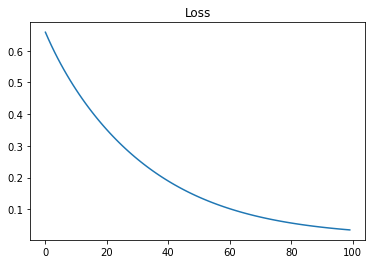

In [21]:
plt.plot(history2.history["loss"])
plt.title("Loss")
plt.show() 

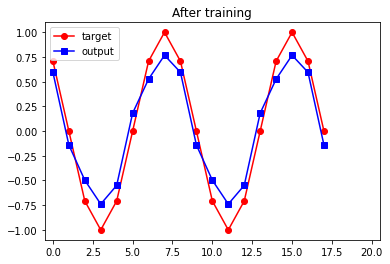

In [22]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model2.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show() 

In [23]:
# 입력에 대한 weights
model2.weights[0]

<tf.Variable 'simple_rnn_1/simple_rnn_cell_1/kernel:0' shape=(1, 5) dtype=float32, numpy=
array([[ 0.87597793, -0.67744356, -0.2653365 , -0.18139847,  0.16022354]],
      dtype=float32)>

In [24]:
# 유닛에 대한 weights
model2.weights[1]

<tf.Variable 'simple_rnn_1/simple_rnn_cell_1/recurrent_kernel:0' shape=(5, 5) dtype=float32, numpy=
array([[ 0.05295658,  0.9481136 ,  0.6338815 ,  0.1953027 , -0.23036282],
       [ 0.41235602, -0.8492975 ,  0.65538037, -0.5009102 ,  0.41319218],
       [ 0.19005835,  0.11531202, -0.18547682, -0.79948586, -0.5169138 ],
       [ 0.17224297, -0.6106807 ,  0.17678908,  0.3400881 , -0.6985929 ],
       [-0.89204293, -0.10515369,  0.3116097 , -0.21603835, -0.15694813]],
      dtype=float32)>

### model 3 (node x 20)

In [25]:
model3 = Sequential()
model3.add(SimpleRNN(20, input_shape=(3, 1)))
model3.add(Dense(1, activation="linear"))
model3.summary()
# 파라미터 (1 + 20) * 20 + 20 = 440

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [26]:
model3.compile(loss='mse', optimizer='sgd')

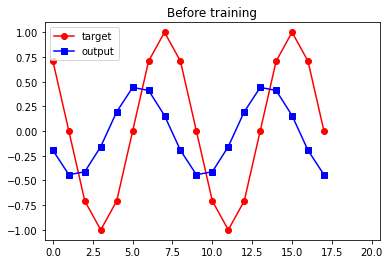

In [27]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model3.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [28]:
history3 = model3.fit(X_train, Y_train, epochs=100) 

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4576
Epoch 2/100
1/1 [==============================] - 0s 798us/step - loss: 0.4192
Epoch 3/100
1/1 [==============================] - 0s 832us/step - loss: 0.3847
Epoch 4/100
1/1 [==============================] - 0s 849us/step - loss: 0.3534
Epoch 5/100
1/1 [==============================] - 0s 811us/step - loss: 0.3249
Epoch 6/100
1/1 [==============================] - 0s 828us/step - loss: 0.2990
Epoch 7/100
1/1 [==============================] - 0s 850us/step - loss: 0.2753
Epoch 8/100
1/1 [==============================] - 0s 844us/step - loss: 0.2536
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2337
Epoch 10/100
1/1 [==============================] - 0s 861us/step - loss: 0.2154
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 0.1985
Epoch 12/100
1/1 [==============================] - 0s 972us/step - loss: 0.1830
Epoch 13/100
1/1 [=========================

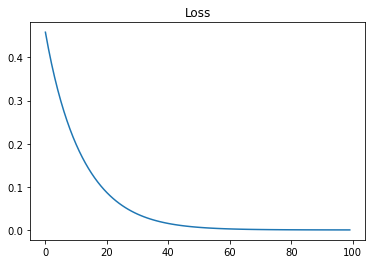

In [29]:
plt.plot(history3.history["loss"])
plt.title("Loss")
plt.show() 

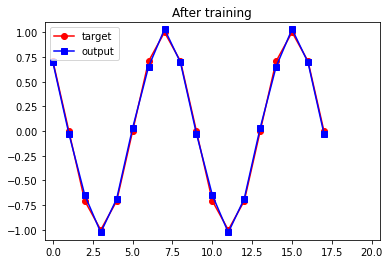

In [30]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model3.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show() 

In [31]:
# 입력에 대한 weights
model3.weights[0]

<tf.Variable 'simple_rnn_2/simple_rnn_cell_2/kernel:0' shape=(1, 20) dtype=float32, numpy=
array([[ 0.14075397, -0.19138166, -0.04931762,  0.05750427,  0.3891532 ,
         0.41768026, -0.11054812, -0.12995957,  0.13075696, -0.2569781 ,
         0.2571414 , -0.40828872,  0.09795636,  0.30929476,  0.42359376,
        -0.10854791, -0.50341666, -0.43094727, -0.00470184,  0.23369357]],
      dtype=float32)>

In [32]:
# 유닛에 대한 weights
model3.weights[1]

<tf.Variable 'simple_rnn_2/simple_rnn_cell_2/recurrent_kernel:0' shape=(20, 20) dtype=float32, numpy=
array([[ 2.32291982e-01,  5.04652448e-02,  3.22066665e-01,
        -2.66291142e-01,  3.71326715e-01, -1.61482450e-02,
        -4.64327373e-02,  7.43845999e-02, -2.91158706e-01,
        -8.25992674e-02,  2.77675241e-01,  2.09937230e-01,
         7.37191811e-02, -2.63569772e-01,  2.19433650e-01,
        -2.08430111e-01, -3.19525123e-01, -1.72321238e-02,
        -2.23345459e-01, -2.84902513e-01],
       [-2.60772586e-01, -2.58374840e-01,  4.35356319e-01,
         4.09686029e-01,  3.26652527e-01,  2.01749563e-01,
         1.83937579e-01, -7.19481781e-02,  4.59220082e-01,
        -7.35653266e-02, -9.62668508e-02,  1.03237946e-02,
         1.95263341e-01,  1.43141663e-02,  7.48134106e-02,
        -9.25019979e-02, -2.48157889e-01, -1.50013324e-02,
         8.17555115e-02,  6.90967813e-02],
       [-7.73016661e-02, -1.05952688e-01, -2.76242122e-02,
        -2.19314292e-01, -2.22864062e-01, -1.